/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4b65aba8>,
      dtype=object)

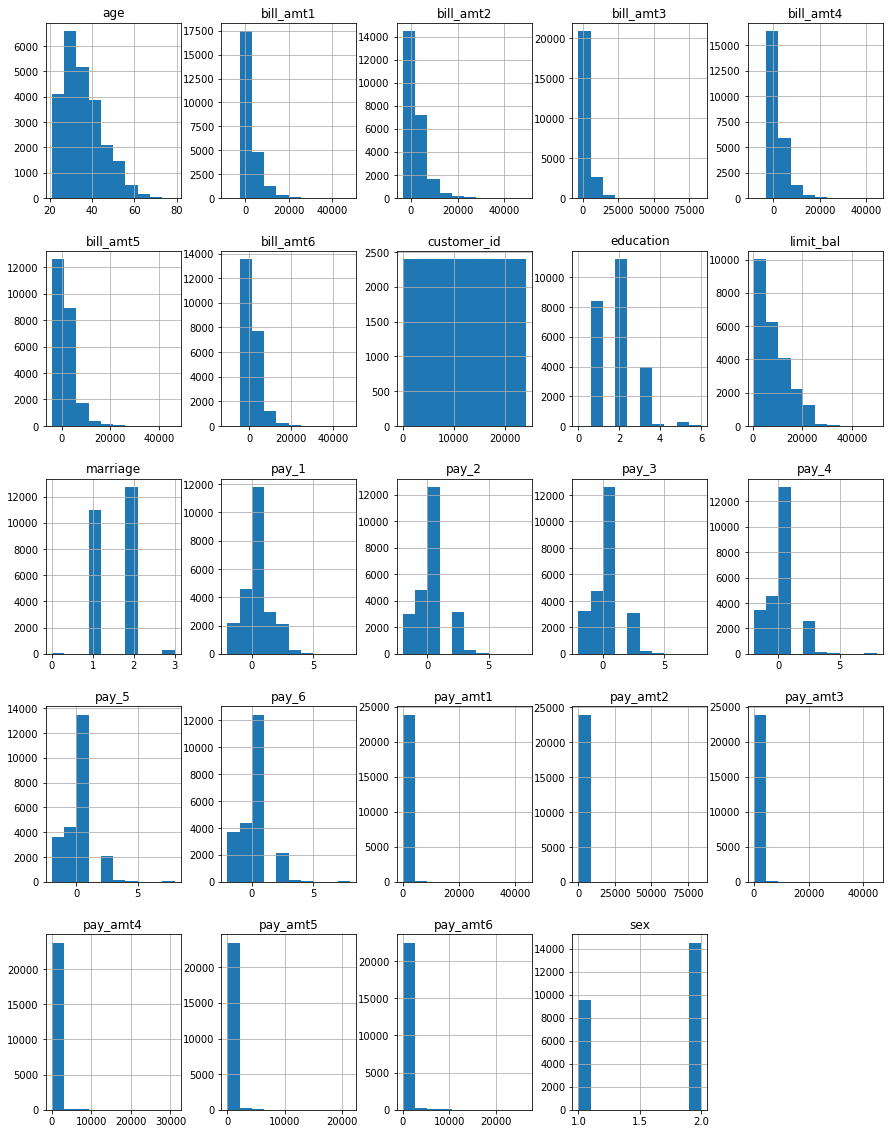

In [146]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
path = os.getcwd()
os.chdir(path)

#Read in data into the dataframe
df_train = pd.read_csv("train.csv")
df_train.head()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_train.hist(ax = ax)

In [147]:
df_train.describe()

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,...,24001.000000,24001.000000,23819.000000,22790.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000
mean,12001.000000,8351.302029,1.604058,1.856839,1.551644,35.498438,-0.015874,-0.132119,-0.166201,-0.215824,...,2359.795592,2175.804383,2024.383559,1960.335981,281.079955,298.237073,263.109704,243.367943,238.731139,256.517069
std,6928.636241,6475.592450,0.489062,0.792152,0.522663,9.222021,1.123554,1.199237,1.196802,1.173350,...,3499.639871,3244.170936,3063.487512,3015.469078,846.819525,1215.481369,899.406651,782.138847,779.341974,861.106314
min,1.000000,500.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3075.000000,-8500.000000,-4066.000000,-10452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6001.000000,2500.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,130.000000,116.000000,90.000000,62.000000,49.000000,41.000000,19.000000,15.000000,12.000000,6.000000
50%,12001.000000,7000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,1007.000000,953.000000,906.000000,855.500000,105.000000,100.000000,90.000000,75.000000,75.000000,75.000000
75%,18001.000000,12000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,3015.000000,2752.000000,2510.500000,2466.000000,250.000000,250.000000,227.000000,200.000000,200.000000,200.000000
max,24001.000000,50000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,83204.000000,44579.000000,46358.000000,48083.000000,43677.000000,84212.000000,44802.000000,31050.000000,21326.000000,26433.000000


In [148]:
# check missing values 
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df_train)



Your selected dataframe has 25 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
pay_6,1211,5.0
bill_amt6,1211,5.0
pay_amt6,1211,5.0
pay_5,182,0.8
bill_amt5,182,0.8
pay_amt5,182,0.8


In [149]:
#Imputing missing values

def data_imputer(df, impute_method):
    col_names = list(df.columns)
    train = pd.get_dummies(df)
    train = train.drop('default_oct_no', axis = 1)
    imputer = Imputer(strategy = impute_method)
    imputer.fit(train)
    train = pd.DataFrame(imputer.transform(train))
    train.columns = col_names
    return train

df_train = data_imputer(df_train, 'median')


In [150]:
from sklearn.model_selection import train_test_split

X = df_train.drop('default_oct', axis = 1)
Y = df_train['default_oct']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)


In [151]:
#Implementing basic Random Forest & evaluating it on log loss

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from pprint import pprint
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score


rfc_basic = RandomForestClassifier()

def  scores(X_train, y_train, y_test, model): 
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)[:,1]
    loss = log_loss(y_test, predictions)
    print("Log loss : {}".format(loss))
    print("=== Confusion Matrix ===")
    print(confusion_matrix(y_test, model.predict(X_test)))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(y_test, model.predict(X_test)))
    print('\n')
    score = roc_auc_score(y_test, model.predict(X_test)) 
    print("=== AUC Score ===")
    print("AUC Score:", score)


scores(X_train, y_train, y_test, rfc_basic)


Log loss : 1.2391000771668863
=== Confusion Matrix ===
[[5309  342]
 [1019  531]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.84      0.94      0.89      5651
        1.0       0.61      0.34      0.44      1550

avg / total       0.79      0.81      0.79      7201



=== AUC Score ===
AUC Score: 0.6410301916303708


16800

In [143]:
#hyper-parameter tuning 
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1000, num = 5 )]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]

# removing few hyperparameters to decrease run-time
#max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }
pprint(random_grid)

rf = RandomForestClassifier()
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = 
                              random_grid,  cv = 10, verbose =2
                              ,random_state = 42, n_jobs = -1)


#runtime: around 13 min
scores(X_train, y_train, y_test, rf_tuned)




{'max_depth': [10, 32, 55, 77, 100],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [100, 325, 550, 775, 1000]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=775, max_features=auto, max_depth=32 ...............
[CV] n_estimators=775, max_features=auto, max_depth=32 ...............
[CV] n_estimators=775, max_features=auto, max_depth=32 ...............
[CV] n_estimators=775, max_features=auto, max_depth=32 ...............
[CV]  n_estimators=775, max_features=auto, max_depth=32, total=  43.1s
[CV]  n_estimators=775, max_features=auto, max_depth=32, total=  43.2s
[CV]  n_estimators=775, max_features=auto, max_depth=32, total=  43.3s
[CV]  n_estimators=775, max_features=auto, max_depth=32, total=  43.3s
[CV] n_estimators=775, max_features=auto, max_depth=32 ...............
[CV] n_estimators=775, max_features=auto, max_depth=32 ...............
[CV] n_estimators=775, max_features=auto, max_depth=32 ...............
[CV] n_estimators=775, max_features=aut

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.8min


[CV]  n_estimators=100, max_features=sqrt, max_depth=100, total=   5.6s
[CV] n_estimators=100, max_features=sqrt, max_depth=100 ..............
[CV]  n_estimators=100, max_features=sqrt, max_depth=100, total=   5.5s
[CV] n_estimators=100, max_features=sqrt, max_depth=100 ..............
[CV]  n_estimators=100, max_features=sqrt, max_depth=100, total=   6.0s
[CV] n_estimators=550, max_features=sqrt, max_depth=32 ...............
[CV]  n_estimators=100, max_features=sqrt, max_depth=100, total=   6.2s
[CV] n_estimators=550, max_features=sqrt, max_depth=32 ...............
[CV]  n_estimators=100, max_features=sqrt, max_depth=100, total=   6.2s
[CV] n_estimators=550, max_features=sqrt, max_depth=32 ...............
[CV]  n_estimators=100, max_features=sqrt, max_depth=100, total=   6.2s
[CV] n_estimators=550, max_features=sqrt, max_depth=32 ...............
[CV]  n_estimators=550, max_features=sqrt, max_depth=32, total=  31.8s
[CV] n_estimators=550, max_features=sqrt, max_depth=32 ...............


[CV]  n_estimators=1000, max_features=sqrt, max_depth=32, total=  58.1s
[CV]  n_estimators=1000, max_features=sqrt, max_depth=32, total=  58.4s
[CV] n_estimators=1000, max_features=sqrt, max_depth=32 ..............
[CV] n_estimators=1000, max_features=sqrt, max_depth=32 ..............
[CV]  n_estimators=1000, max_features=sqrt, max_depth=32, total= 1.0min
[CV] n_estimators=1000, max_features=sqrt, max_depth=32 ..............
[CV]  n_estimators=1000, max_features=sqrt, max_depth=32, total= 1.1min
[CV] n_estimators=1000, max_features=sqrt, max_depth=32 ..............
[CV]  n_estimators=1000, max_features=sqrt, max_depth=32, total= 1.0min
[CV]  n_estimators=1000, max_features=sqrt, max_depth=32, total= 1.0min
[CV]  n_estimators=1000, max_features=sqrt, max_depth=32, total=  49.0s
[CV]  n_estimators=1000, max_features=sqrt, max_depth=32, total=  49.5s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.9min finished


Log loss : 0.4328001742711445
=== Confusion Matrix ===
[[5335  316]
 [ 963  587]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.85      0.94      0.89      5651
        1.0       0.65      0.38      0.48      1550

avg / total       0.80      0.82      0.80      7201



=== AUC Score ===
AUC Score: 0.6613951855509445
